In [25]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [26]:
dataset = read_csv("happydata.csv")

In [27]:
print(dataset.shape)

(143, 7)


In [28]:
print(dataset.head(10))

   infoavail  housecost  schoolquality  policetrust  streetquality  ëvents  \
0          3          3              3            4              2       4   
1          3          2              3            5              4       3   
2          5          3              3            3              3       5   
3          5          4              3            3              3       5   
4          5          4              3            3              3       5   
5          5          5              3            5              5       5   
6          3          1              2            2              1       3   
7          5          4              4            4              4       5   
8          4          1              4            4              4       4   
9          4          4              4            2              5       5   

   happy  
0      0  
1      0  
2      1  
3      0  
4      0  
5      1  
6      0  
7      1  
8      0  
9      0  


In [29]:
print(dataset[["housecost","schoolquality","policetrust","ëvents"]].describe())

        housecost  schoolquality  policetrust      ëvents
count  143.000000     143.000000   143.000000  143.000000
mean     2.538462       3.265734     3.699301    4.216783
std      1.118155       0.992586     0.888383    0.848693
min      1.000000       1.000000     1.000000    1.000000
25%      2.000000       3.000000     3.000000    4.000000
50%      3.000000       3.000000     4.000000    4.000000
75%      3.000000       4.000000     4.000000    5.000000
max      5.000000       5.000000     5.000000    5.000000


In [30]:
print(dataset.groupby('happy').size())

happy
0    66
1    77
dtype: int64


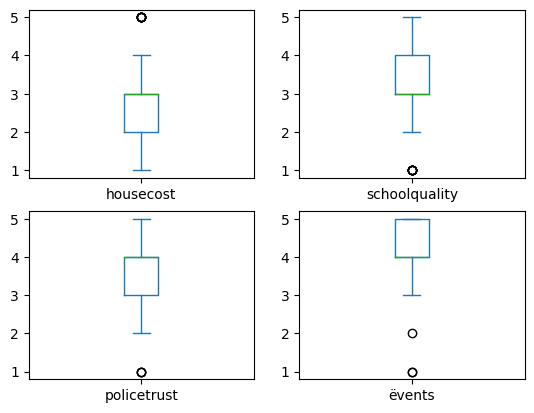

In [31]:
dataset[["housecost","schoolquality","policetrust","ëvents"]].plot(kind='box',subplots=True, \
layout=(2,2),sharex=False,sharey=False)
pyplot.show()

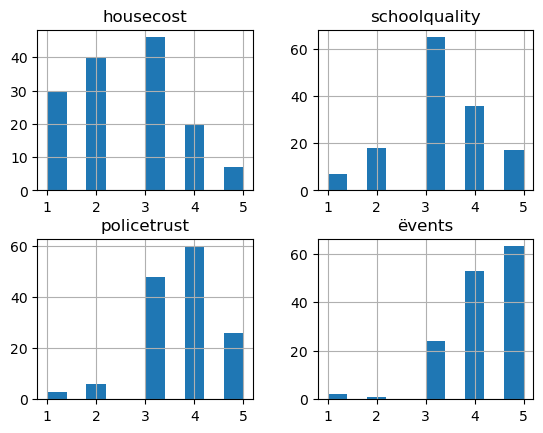

In [32]:
dataset[["housecost","schoolquality","policetrust","ëvents"]].hist()
pyplot.show()

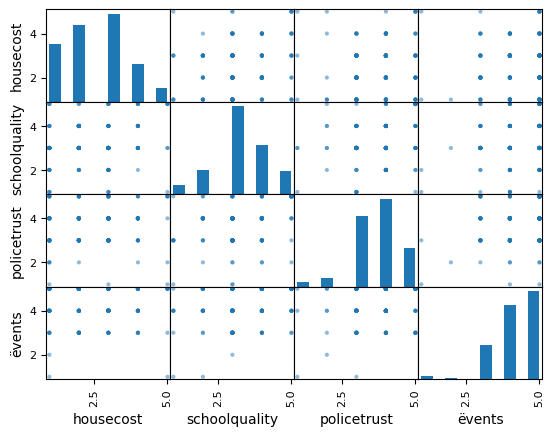

In [33]:
scatter_matrix(dataset[["housecost","schoolquality","policetrust","ëvents"]])
pyplot.show()

In [34]:
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.30, random_state=1)

In [35]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.450000 (0.067082)
LDA: 0.410000 (0.113578)
KNN: 0.420000 (0.097980)
CART: 0.460000 (0.128062)
NB: 0.450000 (0.050000)
SVM: 0.480000 (0.060000)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
C:\ProgramData\Anaconda3\

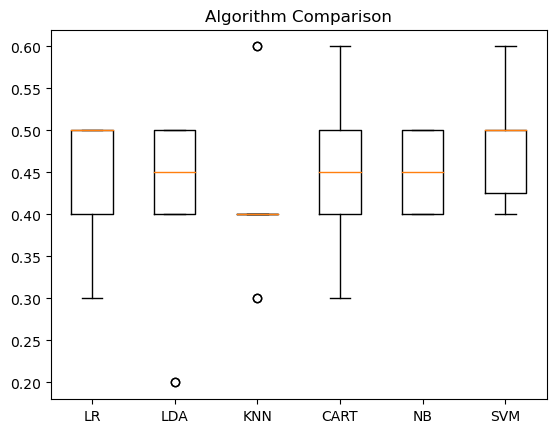

In [24]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [36]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [37]:
print('Accuracy:', accuracy_score(Y_validation, predictions))
print('Confusion Matrix:')
print(confusion_matrix(Y_validation, predictions))
print('Classification Report:')
print(classification_report(Y_validation, predictions))

Accuracy: 0.4186046511627907
Confusion Matrix:
[[ 1  0  0  1  0]
 [ 0  0  4  2  0]
 [ 0  3  3  1  0]
 [ 0  2  4 11  2]
 [ 0  3  2  1  3]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       0.00      0.00      0.00         6
           3       0.23      0.43      0.30         7
           4       0.69      0.58      0.63        19
           5       0.60      0.33      0.43         9

    accuracy                           0.42        43
   macro avg       0.50      0.37      0.40        43
weighted avg       0.51      0.42      0.45        43

